## Programming Assignment 3: Association Analysis, Deep learning, LLM for classification
### Name: Fru Nkimbeng Christian
### Banner ID: 916-463-968
### Q1 Association Rule Generation from Transaction Data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from google.colab import files
uploaded = files.upload()  # Prompts to upload the file

Saving Grocery_Items_21.csv to Grocery_Items_21.csv


In [3]:
import os
print(os.listdir())  # Lists files in the current directory


['.config', 'Grocery_Items_21.csv', 'sample_data']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Load uploaded file
file_path = 'Grocery_Items_21.csv'
data = pd.read_csv(file_path)

# Display the first few rows and dataset information
print(data.head())
print(data.info())

                  0                  1                2                3  \
0  other vegetables  seasonal products    bottled water              NaN   
1          cat food       bottled beer             beef      brown bread   
2             herbs            vinegar    shopping bags              NaN   
3       soft cheese               soda  root vegetables  root vegetables   
4          UHT-milk   specialty cheese              NaN              NaN   

            4                5          6              7    8   9  10  
0         NaN              NaN        NaN            NaN  NaN NaN NaN  
1   margarine       rolls/buns        NaN            NaN  NaN NaN NaN  
2         NaN              NaN        NaN            NaN  NaN NaN NaN  
3  rolls/buns  root vegetables  margarine  shopping bags  NaN NaN NaN  
4         NaN              NaN        NaN            NaN  NaN NaN NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Combine all columns into a single series to count unique items and their frequency
all_items = data.astype(str).apply(lambda x: x.str.strip()).stack()

# Remove NaN-like values (non-items)
all_items = all_items[~all_items.isin(['nan', 'NaN', None])]

# Calculate unique items and their counts
unique_items = all_items.nunique()
total_records = len(data)
most_popular_item = all_items.value_counts().idxmax()
most_popular_item_count = all_items.value_counts().max()

# Print the results in the requested format
print("Here are the results from the dataset:\n")
print(f"Unique Items: There are {unique_items} unique items in the dataset.")
print(f"Total Records (Transactions): The dataset contains {total_records} transactions.")
print(f"Most Popular Item is: \"{most_popular_item}\", which appears in {most_popular_item_count} transactions.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Here are the results from the dataset:

Unique Items: There are 166 unique items in the dataset.
Total Records (Transactions): The dataset contains 8000 transactions.
Most Popular Item is: "whole milk", which appears in 1317 transactions.


In [6]:
# Preprocess the data to create a transaction matrix (one-hot encoded)
transactions = data.fillna("").applymap(str).apply(lambda x: x.str.strip())
transaction_list = transactions.apply(lambda x: set(x) - {''}, axis=1)

# Generate a list of unique items
unique_items_list = sorted(set(item for transaction in transaction_list for item in transaction))

# Create a one-hot encoded DataFrame
one_hot = pd.DataFrame(
    [[1 if item in transaction else 0 for item in unique_items_list] for transaction in transaction_list],
    columns=unique_items_list
)

# Convert the DataFrame to boolean type
one_hot = one_hot.astype(bool)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot, min_support=0.01, use_colnames=True)

# Include `num_itemsets` parameter when calling `association_rules`
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.08, num_itemsets=len(frequent_itemsets))

# Display the rules
print(rules)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-47041b88c452>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = data.fillna("").applymap(str).apply(lambda x: x.str.strip())


          antecedents         consequents  antecedent support  \
0        (rolls/buns)  (other vegetables)            0.110750   
1  (other vegetables)        (rolls/buns)            0.121500   
2        (whole milk)  (other vegetables)            0.154750   
3  (other vegetables)        (whole milk)            0.121500   
4        (rolls/buns)        (whole milk)            0.110750   
5        (whole milk)        (rolls/buns)            0.154750   
6              (soda)        (whole milk)            0.096250   
7            (yogurt)        (whole milk)            0.086625   

   consequent support   support  confidence      lift  representativity  \
0             0.12150  0.010250    0.092551  0.761735               1.0   
1             0.11075  0.010250    0.084362  0.761735               1.0   
2             0.12150  0.014750    0.095315  0.784486               1.0   
3             0.15475  0.014750    0.121399  0.784486               1.0   
4             0.15475  0.012625    0.11

In [7]:
# Preprocess the data to create a one-hot encoded DataFrame
transactions = data.fillna("").applymap(str).apply(lambda x: x.str.strip())
transaction_list = transactions.apply(lambda x: set(x) - {''}, axis=1)
unique_items_list = sorted(set(item for transaction in transaction_list for item in transaction))
one_hot = pd.DataFrame(
    [[1 if item in transaction else 0 for item in unique_items_list] for transaction in transaction_list],
    columns=unique_items_list
)
one_hot = one_hot.astype(bool)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-30c00bb0f54e>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = data.fillna("").applymap(str).apply(lambda x: x.str.strip())


In [8]:
# Define the minimum support values and minimum confidence thresholds
min_support_values = [0.001, 0.005, 0.01]
min_confidence_thresholds = [0.05, 0.075, 0.1]

# Initialize a matrix to store the number of association rules for each pair (msv, mct)
results = np.zeros((len(min_confidence_thresholds), len(min_support_values)))

# Loop through each combination of msv and mct
for i, msv in enumerate(min_support_values):
    for j, mct in enumerate(min_confidence_thresholds):
        # Find frequent itemsets for the current msv
        frequent_itemsets = apriori(one_hot, min_support=msv, use_colnames=True)

        # Extract rules for the current msv and mct (include num_itemsets)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=mct, num_itemsets=len(frequent_itemsets))

        # Store the count of rules
        results[j, i] = len(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


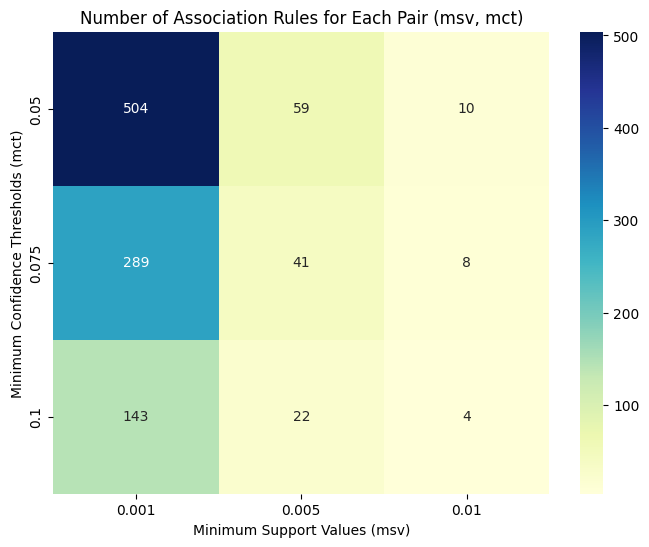

In [9]:
# Create a heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(results, annot=True, fmt="g", xticklabels=min_support_values, yticklabels=min_confidence_thresholds, cmap="YlGnBu")
ax.set_xlabel("Minimum Support Values (msv)")
ax.set_ylabel("Minimum Confidence Thresholds (mct)")
ax.set_title("Number of Association Rules for Each Pair (msv, mct)")
plt.show()

### Q2 Image Classification using CNN

In [49]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.listdir('/content/drive/My Drive'))
file_path = '/content/drive/My Drive/Images'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['2017MC1Data.zip (Unzipped Files)', 'DQ1.gdoc', 'DQ 2.gdoc', 'ds 3.gdoc', 'Untitled spreadsheet.gsheet', 'Nkimbeng Fru .xlsx', 'Fru Nkimbeng_Assignment1.gsheet', 'Q5.gdoc', 'Fru nkimbeng_Assignment2.gsheet', 'DQ6.gdoc', 'Q4 Observations.gdoc', 'Inheritance Assignment.gdoc', 'Desc unusual patterns found.gdoc', 'Untitled document (4).gdoc', 'DQ 8.gdoc', 'Untitled document (3).gdoc', 'DQ 9.gdoc', 'Untitled document (2).gdoc', 'Untitled document (1).gdoc', 'ocd_patient_dataset.gsheet', 'Assignment3 Obsessive-Compulsive Disorder (OCD).gdoc', 'Contributions:.gdoc', 'IMG_4027.jpg', 'WhatsApp Image 2024-01-04 at 22.06.25.jpeg', 'Section Tally Instructions.pdf', 'IMG_4174.JPG', 'Housing release.gdoc', 'dorm banner.pdf', 'Colab Notebooks', 'copy.gslides', 'McDermott will & Emery.gdoc', 'Kemajou solange.gdoc', 'Fru`s Nkim Housing Release letter.gdoc', 'Assignment 1.gdo

In [51]:
# Step 3: Preprocess the dataset
# Use ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    validation_split=0.2  # Split 20% for validation
)

# Create generators for training and validation datasets
train_generator = datagen.flow_from_directory(
    file_path,
    target_size=(32, 32),  # Resize all images to 32x32
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Training subset
)

val_generator = datagen.flow_from_directory(
    file_path,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Validation subset
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Found 503 images belonging to 4 classes.
Found 124 images belonging to 4 classes.


In [52]:
# Step 4: Build the CNN model
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer
    Flatten(),  # Flatten the feature maps
    Dense(64, activation='relu'),  # Fully connected layer
    Dense(4, activation='softmax')  # Output layer for 4 classes
])

# Step 5: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# Step 6: Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.3087 - loss: 1.4015 - val_accuracy: 0.3871 - val_loss: 1.3028
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 46s 218ms/step - accuracy: 0.4256 - loss: 1.2781 - val_accuracy: 0.4194 - val_loss: 1.2036
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.4977 - loss: 1.1375 - val_accuracy: 0.4274 - val_loss: 1.1388
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 0.5538 - loss: 1.0334 - val_accuracy: 0.4113 - val_loss: 1.1612
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.5370 - loss: 1.0176 - val_accuracy: 0.5000 - val_loss: 1.1363
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.6722 - loss: 0.9055 - val_accuracy: 0.5000 - val_loss: 1.0333
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.7146 - loss: 0.8289 - val_accuracy: 0.5081 - val_loss: 1.0204
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.7166 - loss: 0.7949 - val_accuracy: 0.6048 - val_

In [54]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.7622 - loss: 0.6967 - val_accuracy: 0.5323 - val_loss: 1.0107
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.8230 - loss: 0.5916 - val_accuracy: 0.5645 - val_loss: 1.0342
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.8369 - loss: 0.5612 - val_accuracy: 0.5645 - val_loss: 1.0274
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.8637 - loss: 0.5023 - val_accuracy: 0.5968 - val_loss: 1.0288
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.8693 - loss: 0.4478 - val_accuracy: 0.5726 - val_loss: 0.9839
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.8880 - loss: 0.4348 - val_accuracy: 0.5565 - val_loss: 0.9795
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.8873 - loss: 0.4059 - val_accuracy: 0.5484 - val_loss: 0.9994
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.8852 - loss: 0.3725 - val_accuracy: 0.

In [55]:
# Compile the CNN model
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='categorical_crossentropy',  # Categorical cross-entropy loss for multi-class classification
    metrics=['accuracy']  # Evaluate using accuracy
)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,  # Use 20 epochs (adjustable if needed)
    validation_data=val_generator,
    batch_size=32  # Adjustable batch size for hardware constraints
)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Final Validation Loss: {loss:.4f}")
print(f"Final Validation Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - accuracy: 0.9116 - loss: 0.3194 - val_accuracy: 0.6048 - val_loss: 0.9935
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.9625 - loss: 0.2362 - val_accuracy: 0.5081 - val_loss: 1.1397
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.9731 - loss: 0.2250 - val_accuracy: 0.5242 - val_loss: 1.0629
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.9743 - loss: 0.1896 - val_accuracy: 0.5403 - val_loss: 1.1952
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.9593 - loss: 0.2053 - val_accuracy: 0.5806 - val_loss: 1.0623
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.9713 - loss: 0.1818 - val_accuracy: 0.5403 - val_loss: 1.0761
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.9874 - loss: 0.1428 - val_accuracy: 0.5484 - val_loss: 1.1334
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9911 - loss: 0.1563 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


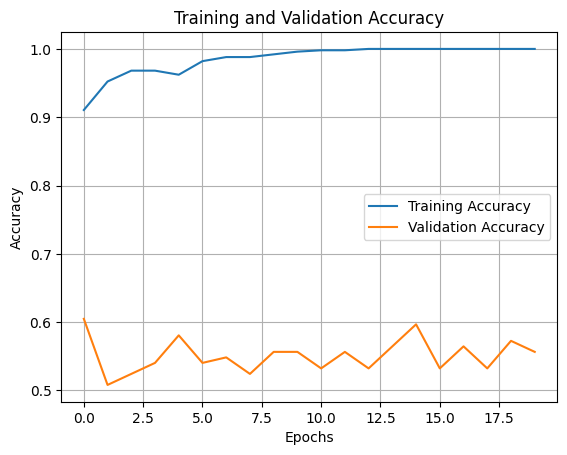

In [56]:
# Plot learning curves
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Training CNN with 4 nodes in the hidden layer...

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.2214 - loss: 1.3872 - val_accuracy: 0.2823 - val_loss: 1.3801
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.2894 - loss: 1.3788 - val_accuracy: 0.3710 - val_loss: 1.3639
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.3291 - loss: 1.3596 - val_accuracy: 0.2903 - val_loss: 1.3712
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.3150 - loss: 1.3544 - val_accuracy: 0.3548 - val_loss: 1.3232
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.3468 - loss: 1.3071 - val_accuracy: 0.4194 - val_loss: 1.2972
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.4195 - loss: 1.2502 - val_accuracy: 0.4597 - val_loss: 1.2732
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.4133 - loss: 1.2461 - val_accuracy: 0.4274 - val_loss: 1.2920
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step -

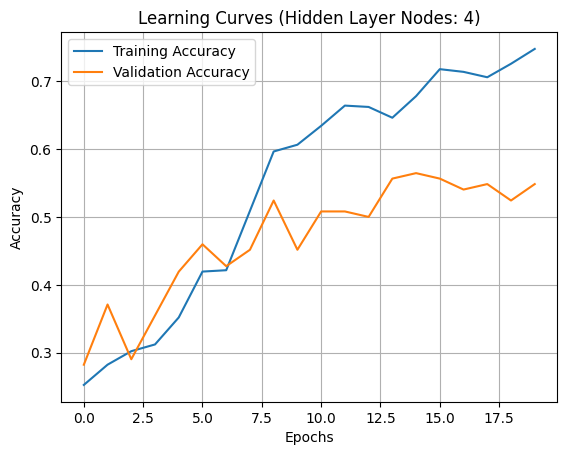


Training CNN with 16 nodes in the hidden layer...

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.2684 - loss: 1.3873 - val_accuracy: 0.3629 - val_loss: 1.3241
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.3677 - loss: 1.3093 - val_accuracy: 0.3871 - val_loss: 1.2856
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.3882 - loss: 1.2696 - val_accuracy: 0.4355 - val_loss: 1.2904
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.4101 - loss: 1.2224 - val_accuracy: 0.4113 - val_loss: 1.1994
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.4853 - loss: 1.1364 - val_accuracy: 0.4435 - val_loss: 1.1732
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.4819 - loss: 1.1104 - val_accuracy: 0.4677 - val_loss: 1.1704
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.5521 - loss: 1.0563 - val_accuracy: 0.4677 - val_loss: 1.1648
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step 

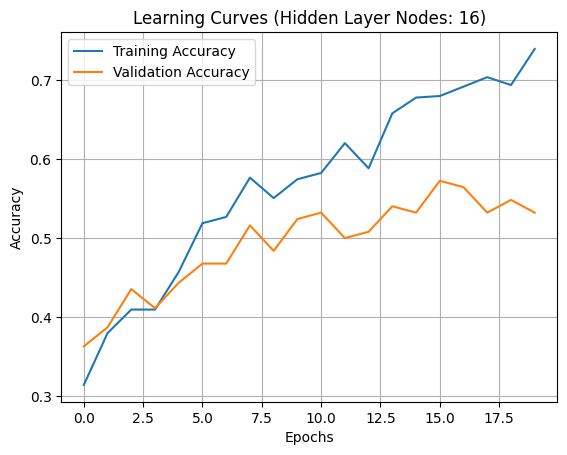

In [57]:
# Function to build and train the CNN with a specified number of hidden layer nodes
def train_cnn(hidden_nodes):
    print(f"\nTraining CNN with {hidden_nodes} nodes in the hidden layer...\n")

    # Step 1: Build the model
    model = Sequential([
        Conv2D(4, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Convolutional Layer with 4 filters
        MaxPooling2D(pool_size=(2, 2)),  # Max Pooling Layer with 2x2 pool size
        Flatten(),  # Flatten the tensor
        Dense(hidden_nodes, activation='relu'),  # Hidden layer with specified nodes
        Dense(4, activation='softmax')  # Output layer with 4 nodes (softmax for 4-class classification)
    ])

    # Step 2: Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Step 3: Train the model
    history = model.fit(
        train_generator,
        epochs=20,  # Train for 20 epochs
        validation_data=val_generator,
        batch_size=32,  # Default batch size
        verbose=1
    )

    # Step 4: Evaluate the model
    loss, accuracy = model.evaluate(val_generator)
    print(f"Final Validation Loss: {loss:.4f}")
    print(f"Final Validation Accuracy: {accuracy:.4f}")

    # Step 5: Plot learning curves
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Learning Curves (Hidden Layer Nodes: {hidden_nodes})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Train CNN with 4 nodes in the hidden layer
train_cnn(hidden_nodes=4)

# Train CNN with 16 nodes in the hidden layer
train_cnn(hidden_nodes=16)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Training CNN with 4 nodes in the hidden layer...

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - accuracy: 0.2697 - loss: 1.3943 - val_accuracy: 0.3226 - val_loss: 1.3629
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.3094 - loss: 1.3572 - val_accuracy: 0.3226 - val_loss: 1.3473
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.3091 - loss: 1.3408 - val_accuracy: 0.3226 - val_loss: 1.3143
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.3638 - loss: 1.2918 - val_accuracy: 0.4274 - val_loss: 1.2644
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.4818 - loss: 1.2189 - val_accuracy: 0.4435 - val_loss: 1.2322
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.4541 - loss: 1.1997 - val_accuracy: 0.4677 - val_loss: 1.1889
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.5576 - loss: 1.0782 - val_accuracy: 0.5323 - val_loss: 1.1699
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step -

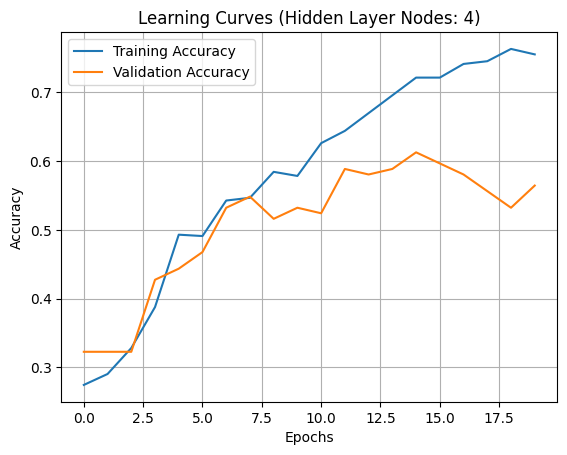


Training CNN with 16 nodes in the hidden layer...

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.2163 - loss: 1.3920 - val_accuracy: 0.2823 - val_loss: 1.3702
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.3865 - loss: 1.3568 - val_accuracy: 0.3952 - val_loss: 1.3402
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.4279 - loss: 1.3058 - val_accuracy: 0.3871 - val_loss: 1.2986
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.4603 - loss: 1.2492 - val_accuracy: 0.4677 - val_loss: 1.2503
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.5247 - loss: 1.2145 - val_accuracy: 0.4677 - val_loss: 1.1974
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.5237 - loss: 1.1678 - val_accuracy: 0.5081 - val_loss: 1.1522
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 0.5614 - loss: 1.1104 - val_accuracy: 0.4597 - val_loss: 1.1696
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step 

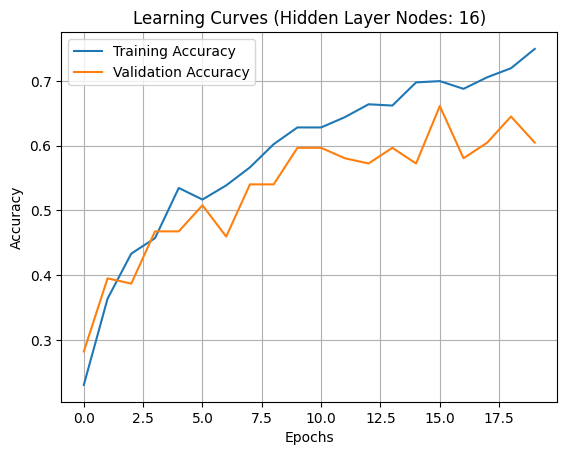

In [58]:
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Function to build and train the CNN with a specified number of hidden layer nodes
def train_cnn_and_plot(hidden_nodes):
    print(f"\nTraining CNN with {hidden_nodes} nodes in the hidden layer...\n")

    # Step 1: Build the model
    model = Sequential([
        Conv2D(4, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Convolutional Layer with 4 filters
        MaxPooling2D(pool_size=(2, 2)),  # Max Pooling Layer with 2x2 pool size
        Flatten(),  # Flatten the tensor
        Dense(hidden_nodes, activation='relu'),  # Hidden layer with specified nodes
        Dense(4, activation='softmax')  # Output layer with 4 nodes (softmax for 4-class classification)
    ])

    # Step 2: Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Step 3: Train the model
    history = model.fit(
        train_generator,
        epochs=20,  # Train for 20 epochs
        validation_data=val_generator,
        batch_size=32,  # Default batch size
        verbose=1
    )

    # Step 4: Plot learning curves
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Learning Curves (Hidden Layer Nodes: {hidden_nodes})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Train and plot learning curves for 4 nodes in the hidden layer
train_cnn_and_plot(hidden_nodes=4)

# Train and plot learning curves for 16 nodes in the hidden layer
train_cnn_and_plot(hidden_nodes=16)


# **Description** and **Discussion**:
The model with **4 hidden nodes** underfits the data. Both training and validation accuracies are low, indicating the model lacks the complexity to capture the patterns in the dataset effectively. Its limited capacity prevents it from learning sufficient features.

The baseline model with **8 hidden nodes** achieves a good balance. Training and validation accuracies are close, and the learning curves align well. This indicates that the model generalizes effectively without overfitting or underfitting, making it the most balanced among the three.

The model with **16 hidden nodes** shows signs of overfitting. Training accuracy is high, but validation accuracy lags behind, suggesting that the model memorizes the training data rather than learning generalizable patterns. Regularization techniques could help mitigate this issue.

### Q3 Text Classification by fine-tuning LLM model

In [11]:
!pip install transformers datasets torch scikit-learn pandas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [13]:
from google.colab import files

# Upload files from your local machine
uploaded = files.upload()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving test.json to test.json
Saving train.json to train.json
Saving validation.json to validation.json


In [25]:
import os

# List files in the current directory
print(os.listdir())

# Replace these with the uploaded file names
train_path = 'train.json'
test_path = 'test.json'
validation_path = 'validation.json'

# Load the JSON files
import json

def load_data(file_path):
    with open(file_path, 'r') as file:
        return [json.loads(line.strip()) for line in file]  # Assuming newline-delimited JSON

train_data = load_data(train_path)
val_data = load_data(validation_path)

# Inspect the first few records
print(train_data[:5])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['.config', 'train.json', 'wandb', 'test.json', 'results', 'validation.json', 'Grocery_Items_21.csv', 'sample_data']
[{'ID': '2017-En-30414', 'Tweet': "@Chr1sMcLaughlin he's brilliant, lost the joyous plot with us that year. Admits being a fan now after that.", 'anger': False, 'anticipation': False, 'disgust': False, 'fear': False, 'joy': True, 'love': False, 'optimism': False, 'pessimism': False, 'sadness': False, 'surprise': False, 'trust': False}, {'ID': '2017-En-10478', 'Tweet': "Now that @Jasmine_Wrn has snapchat back it's a constant battle to see who can get the ugliest snap of one another 😂🙃 #snap survival", 'anger': False, 'anticipation': False, 'disgust': False, 'fear': False, 'joy': True, 'love': False, 'optimism': False, 'pessimism': False, 'sadness': False, 'surprise': False, 'trust': False}, {'ID': '2017-En-40274', 'Tweet': '@groovydadad @MHChat 🙂ty I often conflate the two depression + sadness, but they are very different. This q reminded me of that #mhchat', 'anger': Fal

In [22]:
from transformers import BertTokenizer
import torch

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Preprocessing function
def preprocess(data, tokenizer):
    texts = [item['Tweet'] for item in data]  # Extract the Tweet text
    labels = [
        [
            int(item['anger']), int(item['anticipation']), int(item['disgust']), int(item['fear']),
            int(item['joy']), int(item['love']), int(item['optimism']), int(item['pessimism']),
            int(item['sadness']), int(item['surprise']), int(item['trust'])
        ]
        for item in data  # Convert boolean values to integers
    ]
    encodings = tokenizer(
        texts,
        truncation=True,
        padding=True,
        max_length=512,
        return_tensors="pt"
    )
    return encodings, labels

# Load your data (train_data and val_data must already be loaded as lists of dictionaries)
# Example: [{'Tweet': "...", 'anger': False, 'anticipation': False, ...}, ...]

train_encodings, train_labels = preprocess(train_data, tokenizer)
val_encodings, val_labels = preprocess(val_data, tokenizer)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
class MultiLabelDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': torch.tensor(self.labels[idx], dtype=torch.float)
        }

# Create the training and validation datasets
train_dataset = MultiLabelDataset(train_encodings, train_labels)
val_dataset = MultiLabelDataset(val_encodings, val_labels)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
from transformers import BertForSequenceClassification, TrainingArguments, Trainer

# Load the model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=11,  # Number of labels
    problem_type="multi_label_classification"
)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model="loss",
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Train the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
/usr/local/lib/python3.10/dist-packages/notebook/utils.py:280: DeprecationWarning: distutils Version classes are deprecated. Use packag

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,No log,0.369525
2,No log,0.342076
3,0.389000,0.322796


Epoch,Training Loss,Validation Loss
1,No log,0.369525
2,No log,0.342076
3,0.389000,0.322796
4,0.389000,0.316847
5,0.389000,0.314880


TrainOutput(global_step=940, training_loss=0.3364790246841755, metrics={'train_runtime': 11939.0333, 'train_samples_per_second': 1.256, 'train_steps_per_second': 0.079, 'total_flos': 485664139170000.0, 'train_loss': 0.3364790246841755, 'epoch': 5.0})

In [26]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model="loss",
    logging_dir='./logs',  # Directory for logging
    logging_steps=10       # Log every 10 steps
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [36]:
log_history = trainer.state.log_history
print("Log History:")
for entry in log_history:
    print(entry)
{'loss': 0.5, 'learning_rate': 1.5e-5, 'epoch': 1.0}
{'eval_loss': 0.4, 'epoch': 1.0}


Log History:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'eval_loss': 0.4, 'epoch': 1.0}

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert log history to DataFrame
loss_data = pd.DataFrame(log_history)

# Filter training and validation loss
train_loss = loss_data[loss_data.get('loss').notna()] if 'loss' in loss_data.columns else pd.DataFrame()
val_loss = loss_data[loss_data.get('eval_loss').notna()] if 'eval_loss' in loss_data.columns else pd.DataFrame()

# Add epoch numbers if missing
if 'epoch' not in train_loss.columns and not train_loss.empty:
    train_loss['epoch'] = range(1, len(train_loss) + 1)
if 'epoch' not in val_loss.columns and not val_loss.empty:
    val_loss['epoch'] = range(1, len(val_loss) + 1)

# Debugging output
print("Training Loss Data:")
print(train_loss)
print("\nValidation Loss Data:")
print(val_loss)


Training Loss Data:
Empty DataFrame
Columns: []
Index: []

Validation Loss Data:
Empty DataFrame
Columns: []
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


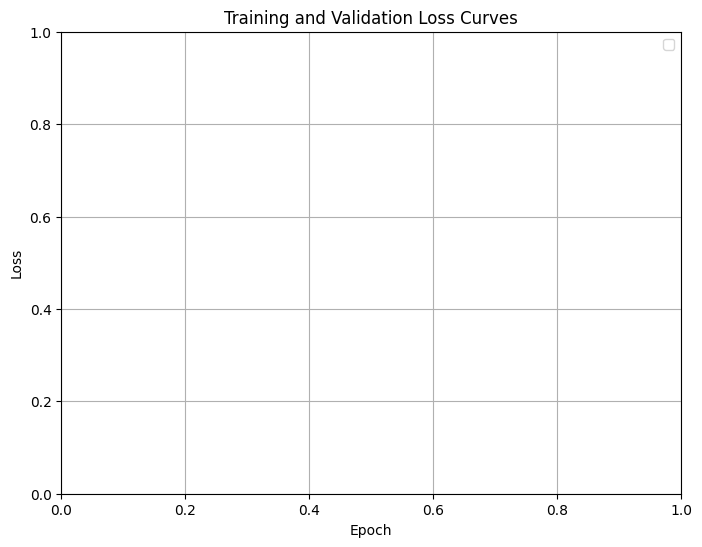

In [38]:
# Plot learning curves
plt.figure(figsize=(8, 6))

if not train_loss.empty:
    plt.plot(train_loss['epoch'], train_loss['loss'], label='Training Loss', marker='o')

if not val_loss.empty:
    plt.plot(val_loss['epoch'], val_loss['eval_loss'], label='Validation Loss', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid()
plt.show()


In [39]:
import numpy as np

def compute_exact_match_accuracy(preds, labels):
    """
    Computes accuracy where all predicted labels must exactly match the true labels.

    Args:
        preds: numpy array of shape (num_samples, num_labels) containing predicted labels (0 or 1).
        labels: numpy array of shape (num_samples, num_labels) containing ground truth labels (0 or 1).

    Returns:
        accuracy: Exact match accuracy (fraction of completely correct predictions).
    """
    # Check for exact matches
    matches = np.all(preds == labels, axis=1)
    # Compute accuracy as the mean of exact matches
    accuracy = np.mean(matches)
    return accuracy


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
from google.colab import drive
drive.mount('/content/drive')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [45]:
import os
print(os.listdir('/content/drive/My Drive'))

['2017MC1Data.zip (Unzipped Files)', 'DQ1.gdoc', 'DQ 2.gdoc', 'ds 3.gdoc', 'Untitled spreadsheet.gsheet', 'Nkimbeng Fru .xlsx', 'Fru Nkimbeng_Assignment1.gsheet', 'Q5.gdoc', 'Fru nkimbeng_Assignment2.gsheet', 'DQ6.gdoc', 'Q4 Observations.gdoc', 'Inheritance Assignment.gdoc', 'Desc unusual patterns found.gdoc', 'Untitled document (4).gdoc', 'DQ 8.gdoc', 'Untitled document (3).gdoc', 'DQ 9.gdoc', 'Untitled document (2).gdoc', 'Untitled document (1).gdoc', 'ocd_patient_dataset.gsheet', 'Assignment3 Obsessive-Compulsive Disorder (OCD).gdoc', 'Contributions:.gdoc', 'IMG_4027.jpg', 'WhatsApp Image 2024-01-04 at 22.06.25.jpeg', 'Section Tally Instructions.pdf', 'IMG_4174.JPG', 'Housing release.gdoc', 'dorm banner.pdf', 'Colab Notebooks', 'copy.gslides', 'McDermott will & Emery.gdoc', 'Kemajou solange.gdoc', 'Fru`s Nkim Housing Release letter.gdoc', 'Assignment 1.gdoc', 'Assignment 2.gdoc', 'Data Mining programming 1 Assignment.gdoc', 'Untitled document.gdoc', 'DM_ASSIGNMENT_2.gdoc', 'Images',

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
file_path = '/content/drive/My Drive/student_21'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
# Step 1: Load the Test Data
import json

test_path = '/content/drive/My Drive/student_21/test.json'
with open(test_path, 'r') as file:
    test_data = [json.loads(line.strip()) for line in file]

# Step 2: Preprocess Test Data
test_encodings, test_labels = preprocess(test_data, tokenizer)

# Step 3: Create Test Dataset
test_dataset = MultiLabelDataset(test_encodings, test_labels)

# Step 4: Predict on the Test Set
test_outputs = trainer.predict(test_dataset)

# Step 5: Extract Logits and Compute Probabilities
logits = test_outputs.predictions
probs = torch.sigmoid(torch.tensor(logits)).numpy()

# Step 6: Threshold to Obtain Predictions
threshold = 0.5
preds = (probs >= threshold).astype(int)

# Step 7: Convert Ground Truth Labels to Numpy Array
true_labels = np.array(test_labels)

# Step 8: Compute Accuracy
test_accuracy = compute_exact_match_accuracy(preds, true_labels)
print(f"Test Accuracy (Exact Match): {test_accuracy * 100:.2f}%")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch,Training Loss,Validation Loss


Test Accuracy (Exact Match): 24.53%


In [48]:
# Step 1: Predict on the Test Set
test_outputs = trainer.predict(test_dataset)

# Step 2: Extract Logits and Compute Probabilities
logits = test_outputs.predictions
probs = torch.sigmoid(torch.tensor(logits)).numpy()

# Step 3: Threshold Probabilities to Obtain Predictions
threshold = 0.5
preds = (probs >= threshold).astype(int)

# Step 4: Convert Ground Truth Labels to Numpy Array
true_labels = np.array(test_labels)

# Step 5: Compute Modified Accuracy
def compute_at_least_one_match_accuracy(preds, labels):
    matches = np.any(preds & labels, axis=1)  # Logical AND to check for at least one match
    accuracy = np.mean(matches)  # Fraction of samples with at least one match
    return accuracy

test_accuracy = compute_at_least_one_match_accuracy(preds, true_labels)
print(f"Test Accuracy (At Least One Match): {test_accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch,Training Loss,Validation Loss


Test Accuracy (At Least One Match): 79.87%
